# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


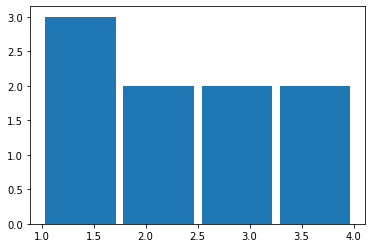

In [5]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [6]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    raise NotImplemented

# 1. Предобработка

Рассмотрим набор данных [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год

In [3]:
!pip3 install pandas
!pip3 install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 4.7 MB 933 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pandas: filename=pandas-1.3.4-cp39-cp39-macosx_11_0_arm64.whl size=10221180 sha256=3b95c360942189843a3682aeedcfe62dbcec8eb83e62ca3635f8a808013ede63
  Stored in directory: /Users/maximgran/Library/Caches/pip/wheels/44/1a/bb/e1d1c2bc72adfa0c96d573d26755d412caa9a1a60b6898983c
Successfully built pandas
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Ho

In [5]:
import pandas as pd

companies = ["Facebook", "Amazon", "Apple", "Netflix", "Google"]
paths = [
    "data/Facebook_Historical_StockPrice2.csv",
    "data/Amazon_Historical_StockPrice2.csv",
    "data/Apple_Historical_StockPrice2.csv",
    "data/Netflix_Historical_StockPrice2.csv",
    "data/Google_Historical_StockPrice2.csv"
]
company_to_path = dict(zip(companies, paths))

df_facebook = pd.read_csv(company_to_path["Facebook"])
df_amazon = pd.read_csv(company_to_path["Amazon"])
df_apple = pd.read_csv(company_to_path["Apple"])
df_netflix = pd.read_csv(company_to_path["Netflix"])
df_google = pd.read_csv(company_to_path["Google"])

df_faang = list(zip([df_facebook, df_amazon, df_apple, df_netflix, df_google], companies))

for (df, _) in df_faang:
    df.dropna(axis=0, inplace=True) # remove all days with any missing information about stock prices.
    df['price_change'] = [cl - op for op, cl in zip(df.Open, df.Close)] # add price change for each day
df_google.head

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

## Сохранение

In [9]:
for (df, name) in df_faang:
    df.to_csv(company_to_path[name])

### Ниже представлен график роста акций FAANG на общем графике. По этому графику легче всего увидеть динамику каждой акции и сравнить с конкурентами.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import datetime

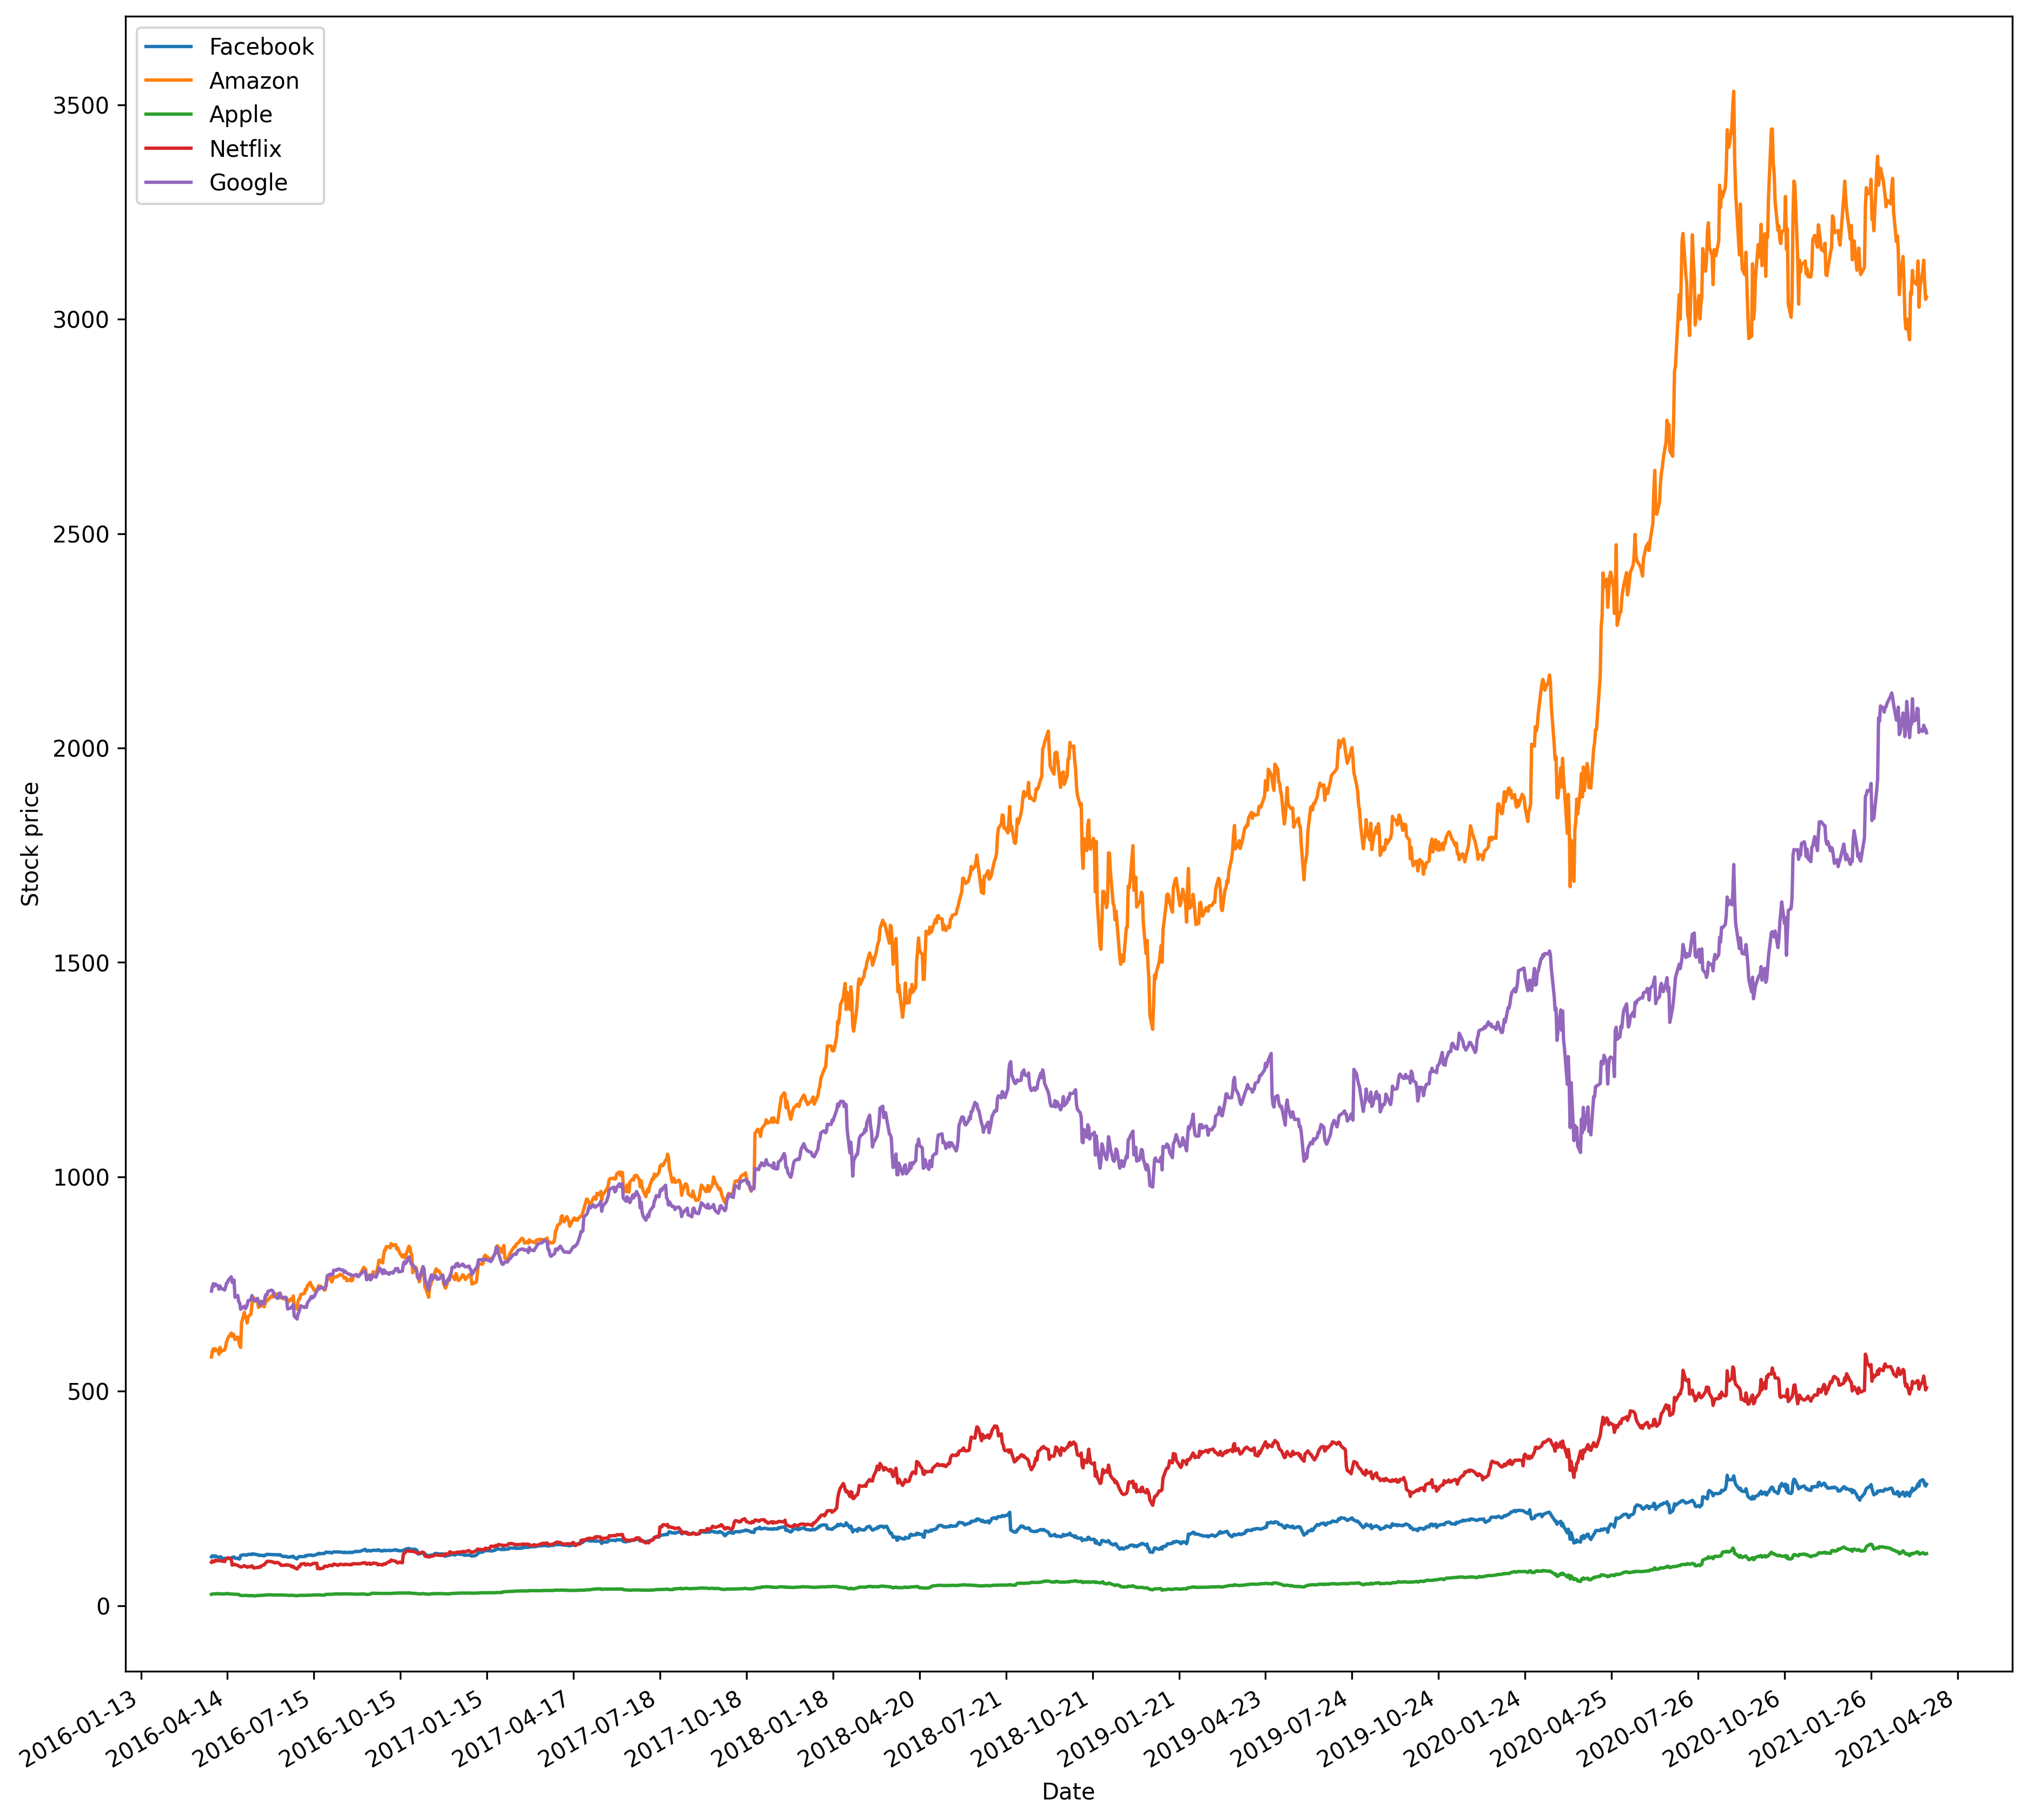

In [14]:
figure(figsize=(15, 15), dpi=300)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=92)) # 92 is number of days in financial quater
plt.gcf().autofmt_xdate()

for (df, _) in df_faang:
    dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in df.Date]
    plt.plot(dates, df.Close)
    
plt.legend([name for (_, name) in df_faang])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.show()

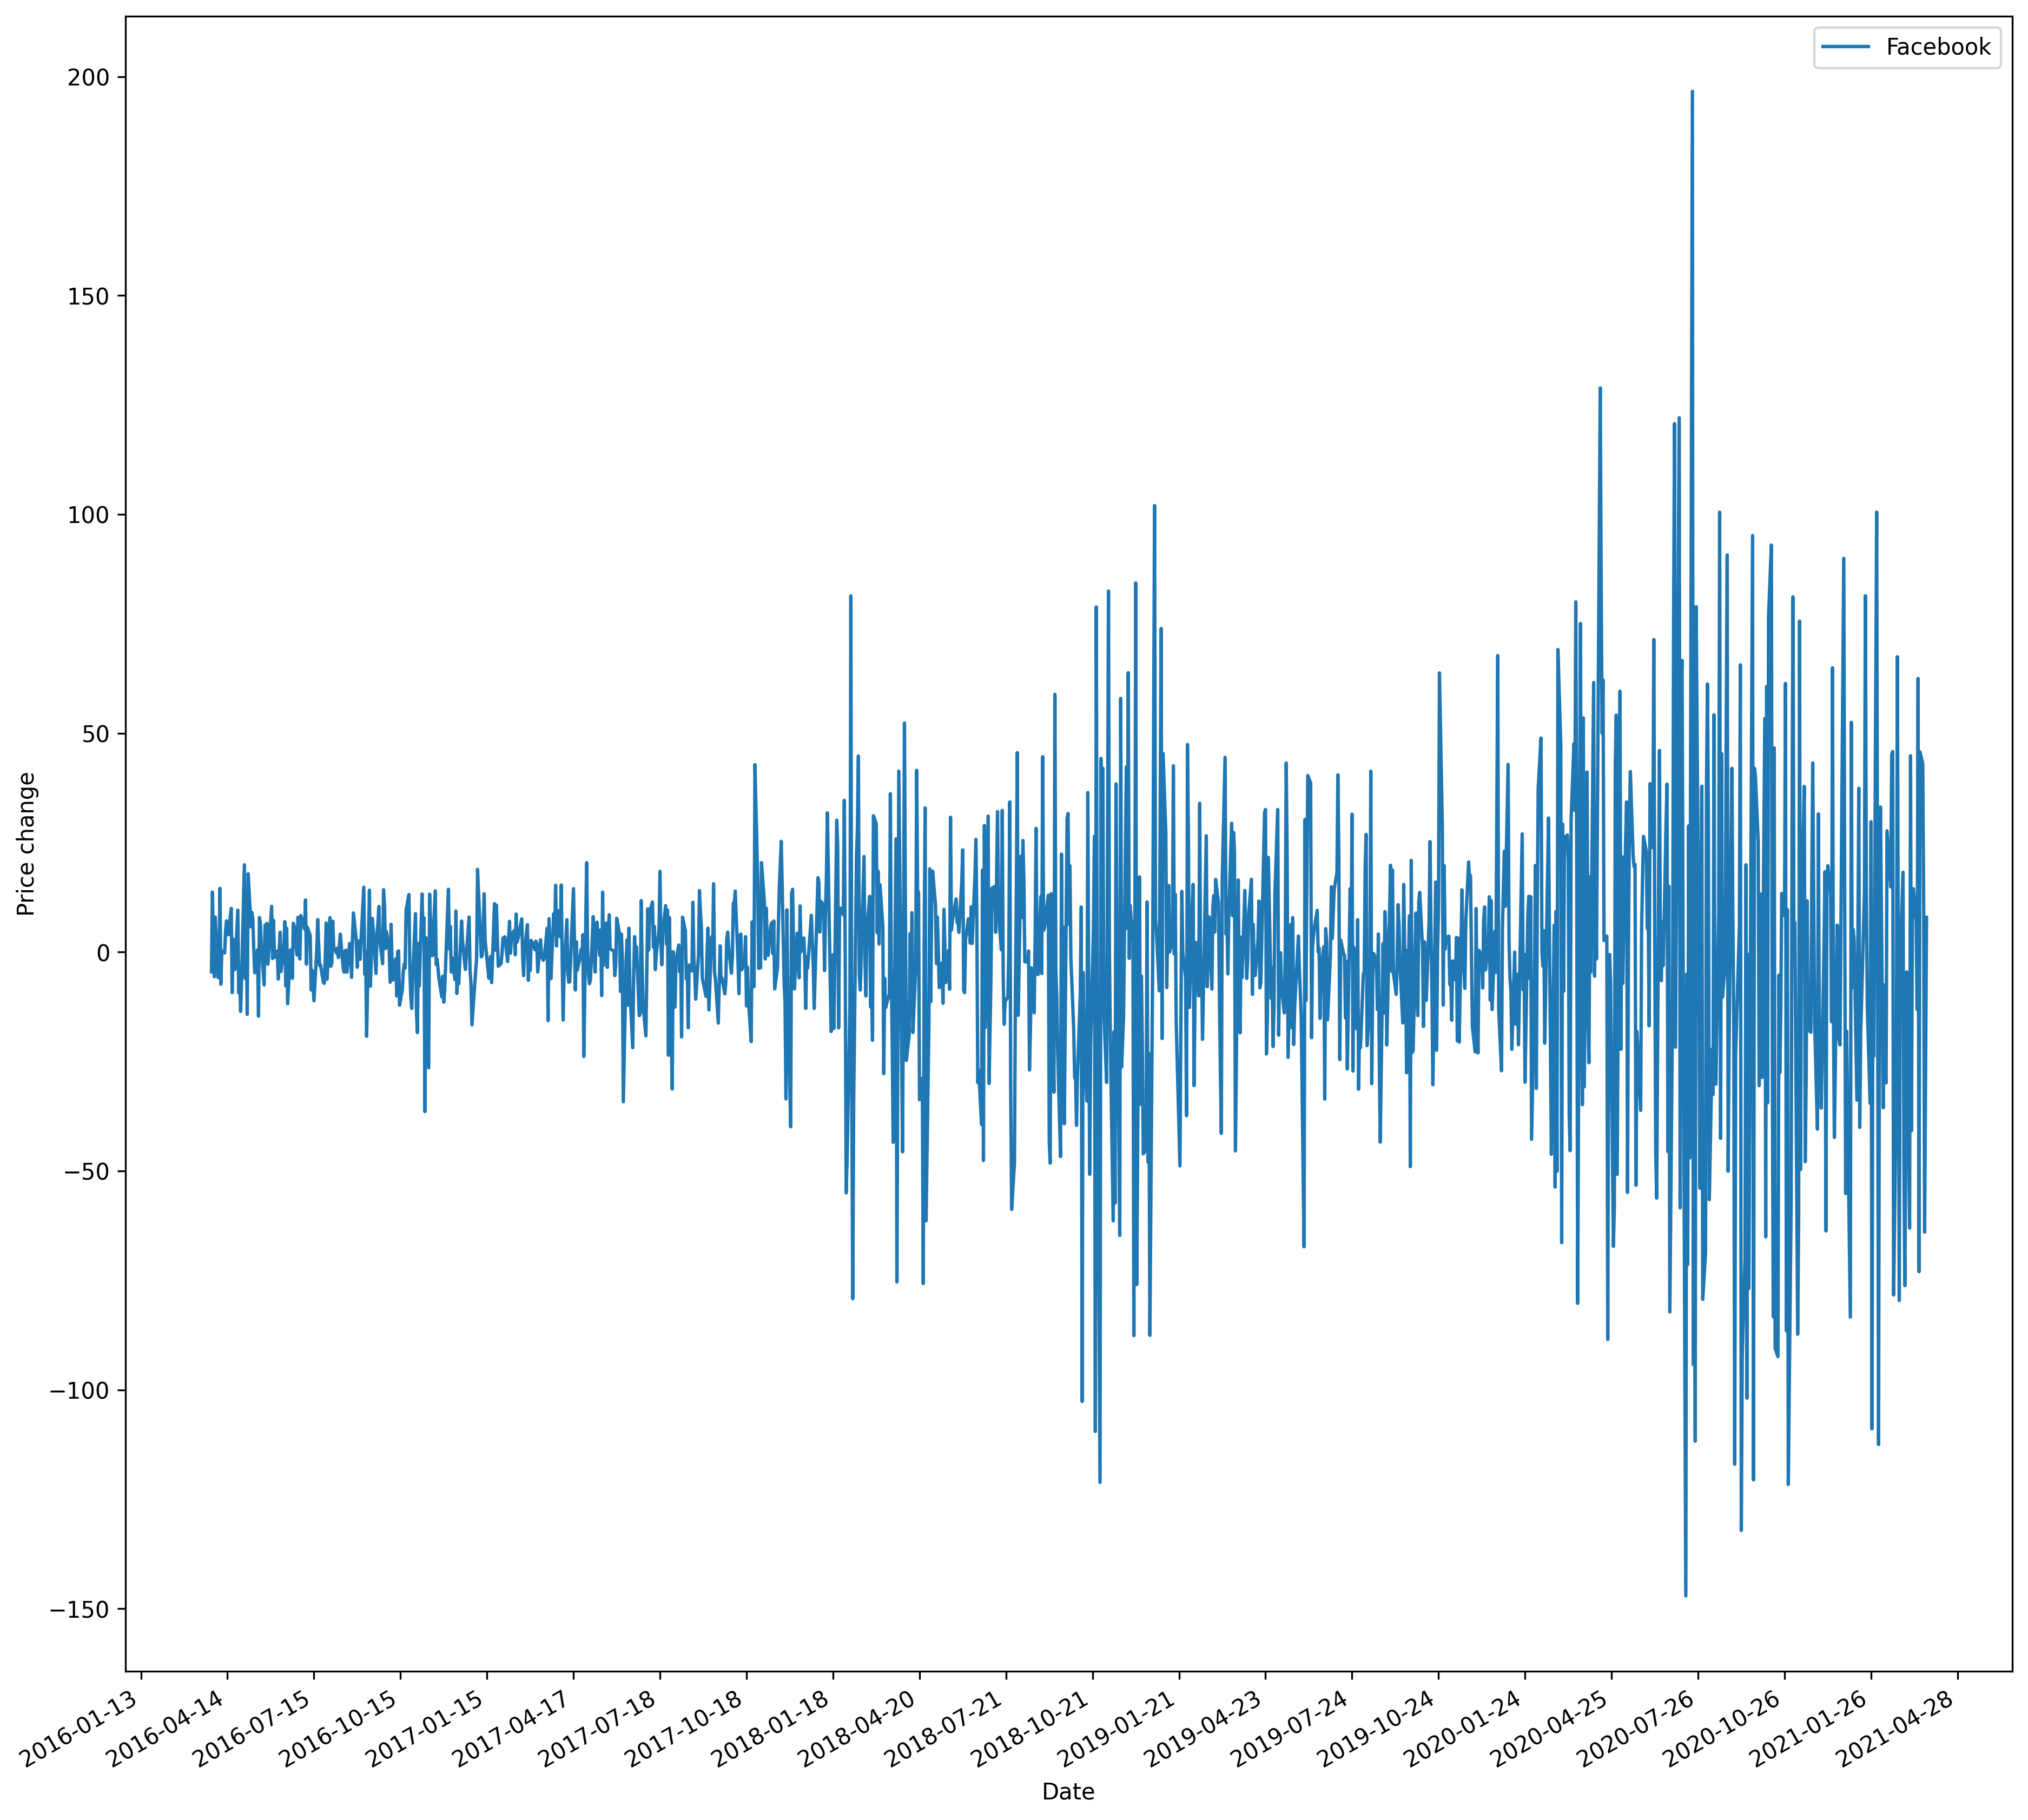

In [25]:
figure(figsize=(15, 15), dpi=300)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=92)) # 92 is number of days in financial quater
plt.gcf().autofmt_xdate()

dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in df.Date]
plt.plot(dates, df_amazon.price_change)
    
plt.legend([name for (_, name) in df_faang])
plt.xlabel("Date")
plt.ylabel("Price change")
plt.show()

### Ниже представлены ящики с усами/диаграммы размаха для каждой компании. На основе этих графиков можно судить о биржевых показателях.

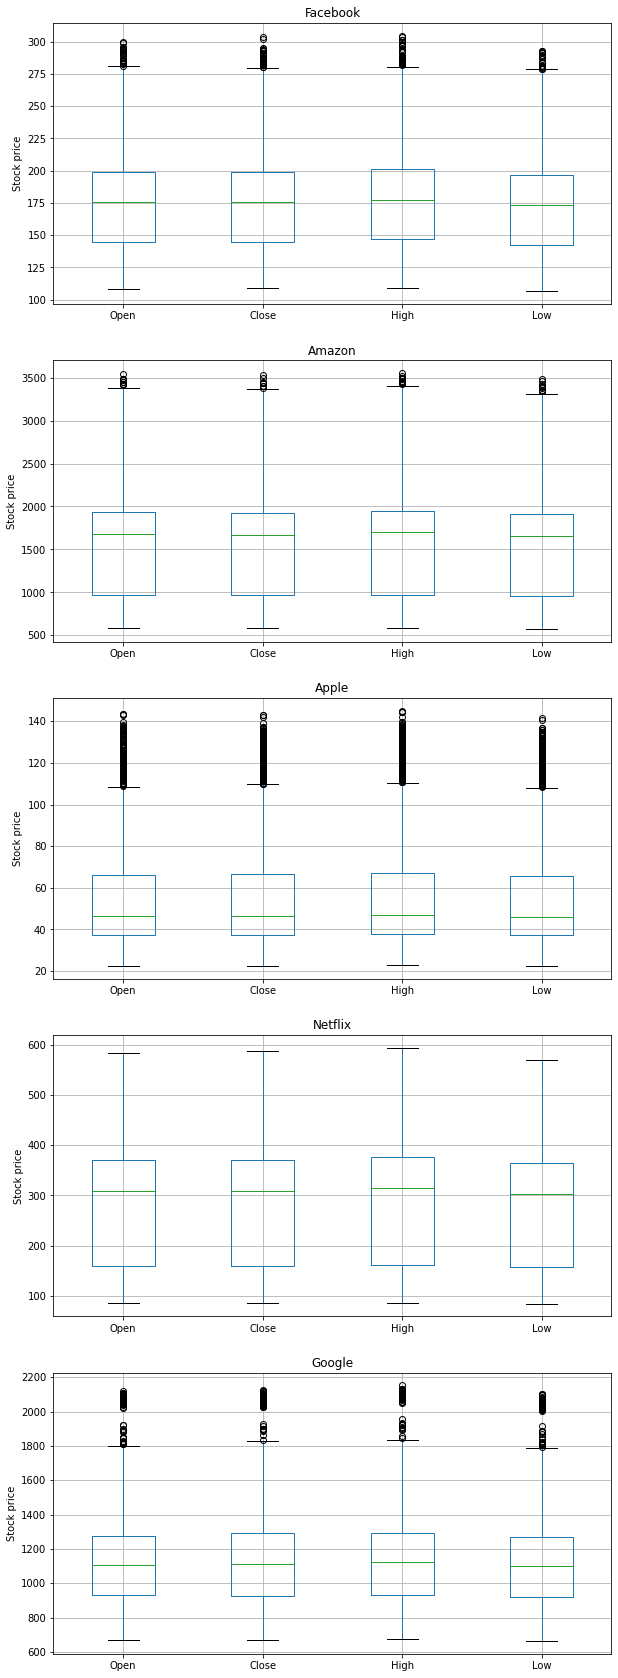

In [16]:

fig, axes = plt.subplots(len(df_faang), figsize=(10, 30))
for i, (df, name) in enumerate(df_faang):
    ax = axes[i]
    ax.set_title(name)
    ax.set(ylabel="Stock price")
    df[["Open", "Close", "High", "Low"]].boxplot(ax=axes[i], return_type='axes')


### Ниже представлены график максимальной прибыли, которую можно было получить при покупке/продаже

Text(0.5, 0, 'Company name')

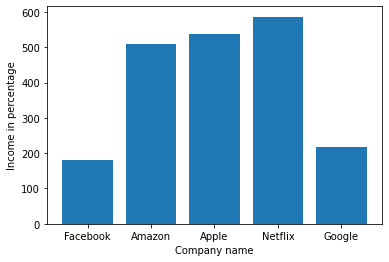

In [17]:
minimums = [(df.Open.min(), name) for df, name in df_faang]
maximums = [df.Close.max() for df, _ in df_faang]
diff, names = zip(*[((mx - mn) / mn * 100, name) for (mn, name), mx in list(zip(minimums, maximums))])

plt.bar(names, diff)
plt.ylabel("Income in percentage")
plt.xlabel("Company name")

### Ниже представлена 2d гистрограмма, по которой (если очень сильно захотеть) можно понять на какой цене за день не происходил рост.

Text(0, 0.5, 'Close price')

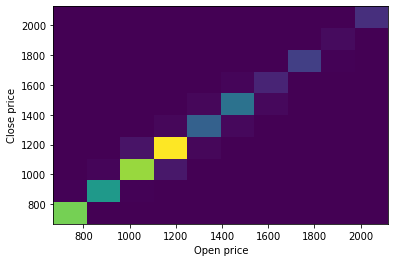

In [18]:
op = [el for el in df.Open for df, _ in df_faang]
cl = [el for el in df.Close for df, _ in df_faang]

plt.hist2d(op, cl)
plt.xlabel("Open price")
plt.ylabel("Close price")

Text(0, 0.5, 'Close price')

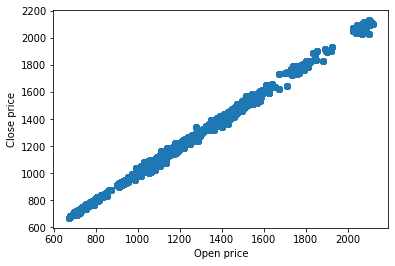

In [19]:
op = [el for el in df.Open for df, _ in df_faang]
cl = [el for el in df.Close for df, _ in df_faang]

plt.scatter(op, cl)
plt.xlabel("Open price")
plt.ylabel("Close price")

### Гипотезы о данных
1. В конце первого квартала 2020 года акции всех компаний стремительно упали. Наверное это связано с COVID-19.
2. С некоторой погрешностью можно утверждать, что в относительных величинах акции растут и падают в одно и то же время. Таким образом не рекомендуется считать диверсификацией портфеля исключительно FAANG акции.

# 2. Интерполяция кривой.

In [20]:
import random
from scipy import interpolate as interp
import matplotlib.pyplot as plt
import numpy as np

# Рассмотрим квадратичныю интерполяцию

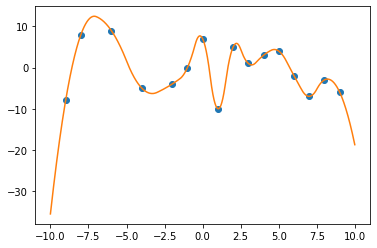

In [21]:
NUMBER_OF_POINTS = 16
x = random.sample(range(-10, 10), NUMBER_OF_POINTS)
y = random.sample(range(-10, 10), NUMBER_OF_POINTS)
min_x = min(x)
max_x = max(x)
points_to_eval = np.arange(-10, 10, 0.01)
scipy_eval = (interp.interp1d(x, y, kind='quadratic', fill_value='extrapolate'))(points_to_eval)
plt.plot(x, y, 'o', points_to_eval, scipy_eval, '-')

# Интерполяция Лагранжа

In [22]:
def langrange(x, y, point):
    s = 0
    for i in range(len(x)):
        s += y[i] * np.prod([(point - x[j]) / (x[i] - x[j]) for j in range(len(x)) if j != i])
    return s

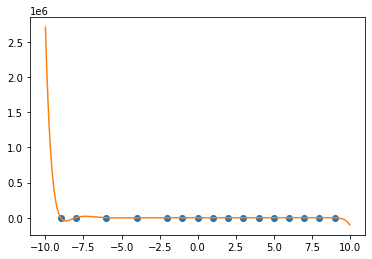

In [23]:
custom_eval = [langrange(x, y, point) for point in points_to_eval]
plt.plot(x, y, 'o', points_to_eval, custom_eval, '-')
plt.show()

Подробнее про интерполяцию можно почитать [тут](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

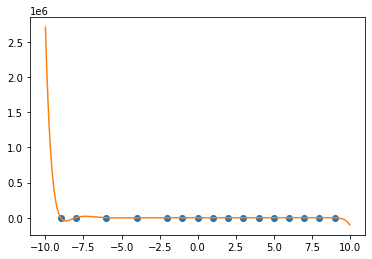

In [24]:
scipy_eval = (interp.lagrange(x, y))(points_to_eval)
plt.plot(x, y, 'o', points_to_eval, scipy_eval, '-')
plt.show()

Реализация интерполяции Лагранжа в [scipy](https://github.com/scipy/scipy/blob/fe319a872faf3dca80261216b38e14297c879abd/scipy/interpolate/interpolate.py#L25)

# 3. Быстрая гистограмма

In [72]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    array.sort()
    labels = (np.arange(array[0], array[-1], get_eps(array, bins))).tolist()
    regions = [0] * bins
    right = 0
    for bin in range(bins):
        next_bin_label = labels[bin + 1] if bin < bins - 1 else labels[bin] + 100
        while right < len(array) and array[right] < next_bin_label:
            right += 1
            regions[bin] += 1

    return regions, labels


def get_width(array: List[Union[int, float]], bins: int) -> List[float]:
    return [get_eps(array, bins)] * bins


def get_eps(array: List[Union[int, float]], bins: int) -> float:
    return (array[-1] - array[0]) / bins



(array([2., 1., 4., 3., 1., 3., 4., 5., 5., 2., 3., 4., 2., 2., 3., 3., 2.,
        7., 2., 2.]),
 array([-100.  ,  -90.15,  -80.3 ,  -70.45,  -60.6 ,  -50.75,  -40.9 ,
         -31.05,  -21.2 ,  -11.35,   -1.5 ,    8.35,   18.2 ,   28.05,
          37.9 ,   47.75,   57.6 ,   67.45,   77.3 ,   87.15,   97.  ]),
 <BarContainer object of 20 artists>)

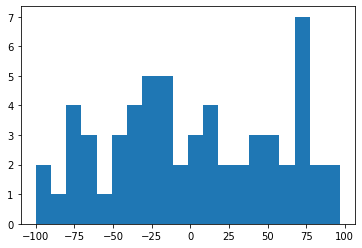

In [24]:
bins = random.randint(2, 20)
nums = random.sample(range(-100, 100), 60)

plt.hist(nums, bins)

<BarContainer object of 20 artists>

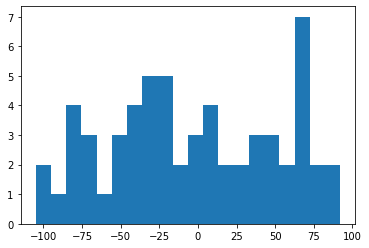

In [25]:
height, lables = fast_hist(nums, bins)
plt.bar(lables, height, get_width(nums, bins))

In [38]:
import timeit 
def get_time(f, nums, bins):
      return timeit.timeit(lambda: f(nums, bins), number=8)

0.00021820799997840368 0.04052470800002084


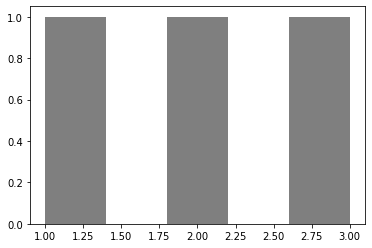

In [40]:
fast_time = measure_time(fast_hist, [1, 2, 3], 5)
plt_time = measure_time(plt.hist, [1, 2, 3], 5)
print(my_time, plt_time)